In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
df = pd.read_csv('/content/bollywood_data_set.csv')

In [3]:
# Display the first few rows
print(df.head())

   Unnamed: 0     imdb-id         movie_name year_of_release  runtime  \
0           0  tt10811166  The Kashmir Files          (2022)  170 min   
1           1   tt1187043           3 Idiots          (2009)  170 min   
2           2   tt0986264   Taare Zameen Par          (2007)  165 min   
3           3   tt5074352             Dangal          (2016)  161 min   
4           4   tt2338151                 PK          (2014)  153 min   

  IMDB_rating no_of_votes                                   plot_description  \
0         8.3     548,031  The Kashmir Files' is a story, based on video ...   
1         8.4     387,020  Two friends are searching for their long lost ...   
2         8.3     188,938  An eight-year-old boy is thought to be a lazy ...   
3         8.3     183,452  Former wrestler Mahavir Singh Phogat and his t...   
4         8.1     180,108  An alien on Earth loses the only device he can...   

          director                                             actors  
0  Vivek

In [4]:
# Create a directed graph
G = nx.DiGraph()

In [7]:
# Check the data type of the 'actors' column
print(df['actors'].dtypes)

object


In [8]:
# Handle the 'actors' column
df['actors'] = df['actors'].astype(str)

In [9]:
for _, row in df.iterrows():
    G.add_node(row['imdb-id'],
               movie_name=row['movie_name'],
               year_of_release=row['year_of_release'],
               runtime=row['runtime'],
               rating=row['IMDB_rating'],
               no_of_votes=row['no_of_votes'],
               plot_description=row['plot_description'],
               director=row['director'],
               actors=row['actors'].split(', '))

In [10]:
# Add edges to the graph
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if set(df.iloc[i]['actors'].split(', ')) & set(df.iloc[j]['actors'].split(', ')):
            G.add_edge(df.iloc[i]['imdb-id'], df.iloc[j]['imdb-id'])

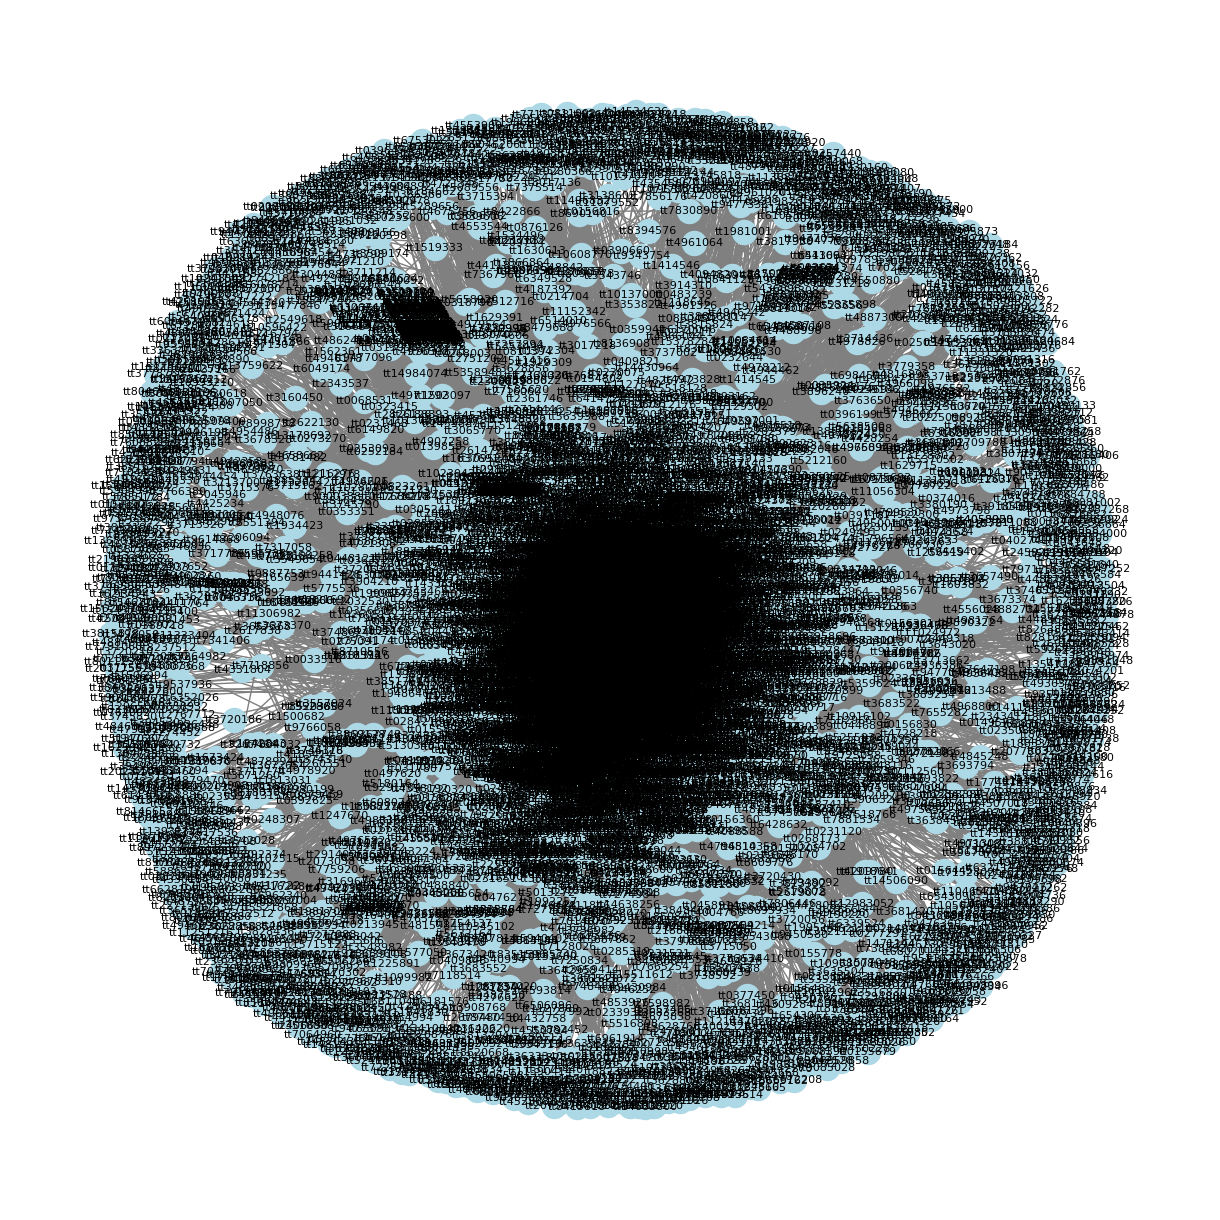

In [11]:
# Visualize the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8)
plt.show()

In [14]:
# Function to get similar movies
def get_similar_movies(movie_id, top_n=3):
    """
    Finds the top N most similar movies to the given movie.
    """
    if movie_id not in G:
        return []

    # Get the neighbors of the given movie
    neighbors = list(G.neighbors(movie_id))

    # Calculate similarity scores based on shared actors
    similarity_scores = []
    for neighbor in neighbors:
        shared_actors = set(G.nodes[movie_id]['actors']) & set(G.nodes[neighbor]['actors'])
        similarity_score = len(shared_actors) / (len(G.nodes[movie_id]['actors']) + len(G.nodes[neighbor]['actors']) - len(shared_actors))
        similarity_scores.append((neighbor, similarity_score))

    # Sort the neighbors by similarity score and return the top N
    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    return [G.nodes[x[0]]['movie_name'] for x in similarity_scores[:top_n]]

In [15]:
# Example usage
print(get_similar_movies('tt1081116'))

[]
